# TP-TD 2

In [47]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Ploting PDF and CDF using a sample



## Exercise 2: Uniform distribution stimulation with applications
Let $X$ and $Y$ two random variables with respective PDFs $f_X$  and $f_Y$ such that 

$f_X (t) = e^{|t|}$ and $f_Y (t) = \pi(1+t)$

Let  $A = \{(x, y) ∈ \mathbb { R} / f_X (x) \gt y \gt −f_Y (x)\}$  and the couple $(U_1 , U_2 )$ follows uniform distribution over $A$.

We note $f_1$ the density of $U_1$ and $f_2$ the marginal density of $U_2$.

1. Let us simulate $X$ and $Y$

## Exercise 3: Gaussian couple stimulation

## Exercise 4: Simulation of a random walk

Let $X_n$ a family of iid random variables with the same Bernoulli distribution with parameter $\frac{1}{2}$ and let $S_n={\sum}_{k=0}^{n} X_k$

1. Let us simulate $X_n$

In [57]:
# Parameter of the Bernoulli distribution
p = 1/2

# Simulate a Bernoulli distribution
def bernoulli(p):
    u=np.random.uniform()
    if u <= p:
        return 1
    else:
        return 0

# Example
result = bernoulli(p)
print("Result of Bernoulli simultion", result)

# Xn simulation

# Parameters

n = 100  # Number of variables to simulate

# Simulation of Xn
Xn = [bernoulli(p) for _ in range(n)]

print('Result of Xn simulation:',Xn,sep='\n')

Result of Bernoulli simultion 1
Result of Xn simulation:
[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]


2. The plot of $(n,S_n)$

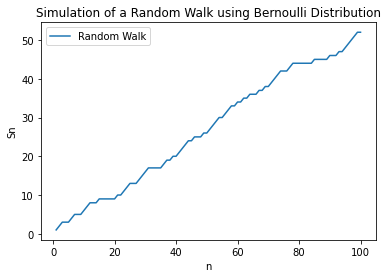

In [58]:
# Calculation of the cumulative sum to get the random walk
Sn = np.cumsum(Xn)

# Plotting the random walk
plt.plot(range(1, n+1), Sn, label='Random Walk')
plt.xlabel('n')
plt.ylabel('Sn')
plt.title('Simulation of a Random Walk using Bernoulli Distribution')
plt.legend()
plt.show()

## Exercise 5: Brown movement simulation

Let $(X_t)_{t\le 0}$ a process defined by:

\begin{align*}
&X_n=0\\
&\forall s\ge t \text{, } s\ge 0 \text{, }  (X_s-X_t) \sim \mathcal N(0, \sqrt{s-t})\\
&\forall s\ge t \text{, } s\ge 0\text{, }   (X_s-X_t) \text{ is mutually independant with }  (X_u)_{0\le u\le t}
\end{align*}

1. Let us use Box-Muller's method to simulate $\mathcal N(0, \sigma)$

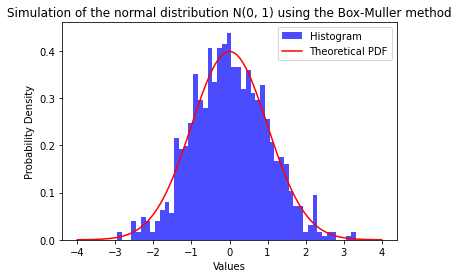

In [50]:
#Normal distribution usingg Box-Muller
def normal(sigma,m=0):
    u, v = np.random.uniform(size=2)
    y = np.sqrt(-2 * np.log(u)) * np.sin(2 * np.pi * v)
    x = m + sigma * y
    return x

# Parameters of the normal distribution
m = 0
sigma = 1

# Number of samples to generate
n = 1000

# Generate samples from the normal distribution
samples = np.array([normal(sigma,m) for _ in range(n)]).flatten()

# Plotting the histogram of the samples
plt.hist(samples, bins=50, density=True, alpha=0.7, color='b', label='Histogram')

# Plotting the theoretical probability density function
x = np.linspace(m - 4*sigma, m + 4*sigma, 100)
pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - m)**2 / (2 * sigma**2))
plt.plot(x, pdf, 'r', label='Theoretical PDF')

plt.title(f'Simulation of the normal distribution N({m}, {sigma}) using the Box-Muller method')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

2. Let us plot the curve $(t,X_t)$

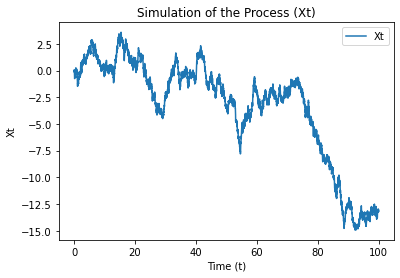

In [51]:
# Parameters of the process
T = 100  # Total time
h = 0.01  # Time step
steps = int(T / h) + 1  # Number of steps

# Initialization of the process
t_values = np.linspace(0, T, steps)
X_values = np.zeros(steps)

# Simulation of the process
for i in range(1, steps):
    delta_t = t_values[i] - t_values[i-1]
    X_values[i] = X_values[i-1] + normal(np.sqrt(delta_t))

# Plotting the curve (t, Xt)
plt.plot(t_values, X_values, label='Xt')
plt.xlabel('Time (t)')
plt.ylabel('Xt')
plt.title('Simulation of the Process (Xt)')
plt.legend()
plt.show()

3. Let $(Y_t)$ another process that satisfies the same properties as $X_t$, but independant from $X_t$. 
Let us plot the parametric curve $(X_t, Y_t)$

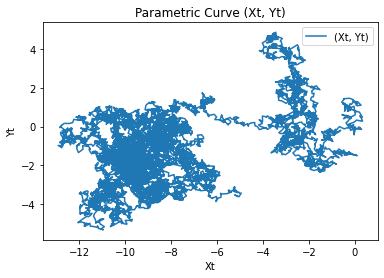

In [59]:
# Parameters of the process
T = 100  # Total time
h = 0.01  # Time step
steps = int(T / h) + 1  # Number of steps

# Initialization of the processes
t_values = np.linspace(0, T, steps)
X_values = np.zeros(steps)
Y_values = np.zeros(steps)

# Simulation of the processes
for i in range(1, steps):
    delta_t = t_values[i] - t_values[i-1]
    X_values[i] = X_values[i-1] + normal(np.sqrt(delta_t))
    Y_values[i] = Y_values[i-1] + normal(np.sqrt(delta_t))

# Plotting the parametric curve (Xt, Yt)
plt.plot(X_values, Y_values, label='(Xt, Yt)')
plt.xlabel('Xt')
plt.ylabel('Yt')
plt.title('Parametric Curve (Xt, Yt)')
plt.legend()
plt.show()

## Exercise 6: Poisson process simulation


Let $X_n$ a family of iid random variables with the same exponential distribution with parameter $\lambda$ and let $S_n={\sum}_{k=0}^{n} X_k$ and $N(t)=min\{n/Sn \gt  t\}$

1. Let us simulate $X_n$

In [104]:
def exponential(lam):
    u=np.random.uniform(0,1)
    return -np.log(1-u)/lam

    
exponential(3)

def Xn_simulation(lam,n=100):
    return [exponential(lam) for _ in range(n)]

lam=0.5
Xn=Xn_simulation(lam)
print('Result of Xn simulation:',Xn,sep='\n')

Result of Xn simulation:
[4.3217890318505585, 5.690800145642016, 0.8632050658018451, 0.4818225795514068, 3.4979139473282492, 0.016600920413753082, 1.5555832579524413, 1.5223638566404907, 0.9805718464644474, 0.18392872676544703, 7.295314437981774, 0.16440904942288379, 0.16917225081906168, 3.3572046410790324, 3.0632610212502054, 0.6628982726934697, 0.15774763825411772, 0.38793394012467647, 0.9288238516444144, 0.24239391763261733, 5.138847631038075, 1.6659941805389558, 0.01752768444065663, 0.3231210594061932, 3.3282971825234164, 0.12541110870970773, 0.6076248975273156, 1.807500437990109, 2.3956580153733253, 0.004245206403184041, 4.4160232990455, 0.40640955475504476, 1.2370669130228025, 0.063978930561484, 1.2619875691752918, 0.43863698552335856, 0.23505816650863362, 1.1364385013828449, 4.653854695168061, 1.2103524419287885, 1.454690124239439, 1.2394578994039425, 2.383371271230607, 1.2853701808467706, 1.8303663757664377, 2.2511534076165542, 0.2970786428562057, 3.4153755496664373, 2.06686504

2. Let us show that $N(t) \sim \mathcal P(\lambda t)$

3. Let us plot the curve $(t, N (t))$

In [ ]:
ti=0
tf=100